# Correlación entre variables

In [1]:
import pandas as pd
import numpy as np

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df2015 = pd.read_csv('./drive/MyDrive/DatosInvestigacion/LocalTime_2015.csv', index_col=0, parse_dates=True)

In [4]:
df2015.head()

,DC,PAAVG1H,PAMAX1H,PAMIN1H,PRSUM1H,RHAVG1H,RHMAX1H,RHMIN1H,SRDIFAVG1H,SRDIFMAX1H,SRDIFMIN1H,SRDIFSUM1H,SRGLOAVG1H,SRGLOMAX1H,SRGLOMIN1H,SRGLOSUM1H,TAAVG1H,TAMAX1H,TAMIN1H,TS1AVG1H,TS1MAX1H,TS1MIN1H,TS2AVG1H,TS2MAX1H,TS2MIN1H,TS3AVG1H,TS3MAX1H,TS3MIN1H,TS4AVG1H,TS4MAX1H,TS4MIN1H,TS5AVG1H,TS5MAX1H,TS5MIN1H,TS6AVG1H,TS6MAX1H,TS6MIN1H,TS7AVG1H,TS7MAX1H,TS7MIN1H,WD1HA,WD1HX,WDGM,WGD1HX,WGDH,WR1H,WS1HA,WS1HM,WS1HX
Local_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 01:00:00,13.1,743.2,743.6,742.8,0.0,98,99,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8,9.7,8.1,7.9,8.3,7.2,8.4,8.7,7.6,9.6,9.9,9,11.9,12,11.8,14.3,14.4,14.2,15,15,15,15,15,15,65,21,53,71.0,0.0,15.0,1.0,0.0,2.9
2015-01-01 02:00:00,13.1,742.6,742.8,742.4,0.0,96,97,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.6,9.8,9.1,9.1,9.5,8.3,9.4,9.9,8.7,10.4,10.7,9.9,12.1,12.2,12,14.1,14.2,14.1,15,15,15,15,15,15,43,93,17,49.0,1.0,26.0,1.8,0.0,3.0
2015-01-01 03:00:00,13.1,742.1,742.4,741.9,0.0,94,95,93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.9,10.1,9.7,9.5,9.6,9.5,9.9,9.9,9.9,10.8,10.8,10.7,12.2,12.3,12.2,14,14.1,14,15,15,15,15,15,15,47,84,12,55.0,2.0,28.0,1.9,0.5,2.9
2015-01-01 04:00:00,13.0,741.8,741.9,741.7,0.0,95,96,93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.3,9.7,9.4,9.5,8.9,9.8,9.9,9.3,10.7,10.8,10.3,12.3,12.3,12.2,14,14,14,15,15,15,15,15,15,44,97,31,53.0,3.0,23.0,1.5,0.4,2.7
2015-01-01 05:00:00,13.0,741.8,741.9,741.7,0.0,96,98,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,10.0,9.0,8.1,8.9,7.8,8.5,9.3,8.2,9.7,10.3,9.5,12,12.2,11.9,13.9,14,13.9,15,15,15,15,15,15,50,92,51,33.0,4.0,21.0,1.4,0.4,2.6


Se observa la correlación con otras variables mencionadas en el artículo **Hourly global solar irradiation forecasting for New Zealand**
* TAMAX1H ( Temperatura del aire Máxima )
* TAMIN1H ( Temperatura del aire Mínima )
* RHMAX1H ( Humedad Relativa Máxima )
* RHMIN1H ( Humedad Relativa Mínima )
* PRSUM1H ( Precipitación Sumatoria )
* PAAVG1H ( Presión Barométrica Promedio )
* PAMAX1H ( Presión Barométrica Máxima )
* PAMIN1H ( Presión Barométrica Mínima )
* WS1HA ( Velocidad del Viento Promedio )
* WS1HX ( Velocidad del Viento Máxima )
* WD1HA ( Dirección del viento Promedio )

In [ ]:
corr_matrix = df2015[['SRGLOAVG1H','TAMAX1H','TAMIN1H','RHMAX1H','RHMIN1H','PRSUM1H','PAAVG1H','PAMAX1H','PAMIN1H','WS1HA','WS1HX','WD1HA']].corr()

In [ ]:
corr_matrix

,SRGLOAVG1H,TAMAX1H,TAMIN1H,RHMAX1H,RHMIN1H,PRSUM1H,PAAVG1H,PAMAX1H,PAMIN1H,WS1HA,WS1HX,WD1HA
SRGLOAVG1H,1.000000,0.751529,0.663405,-0.640184,-0.737505,-0.034822,-0.008305,0.011502,-0.028357,0.517205,0.644763,-0.102986
TAMAX1H,0.751529,1.000000,0.960596,-0.761022,-0.844383,0.009717,-0.289704,-0.270793,-0.308152,0.536360,0.705499,-0.075234
TAMIN1H,0.663405,0.960596,1.000000,-0.750376,-0.764862,0.012514,-0.311513,-0.294523,-0.327868,0.534414,0.677145,-0.066928
RHMAX1H,-0.640184,-0.761022,-0.750376,1.000000,0.932536,0.107652,0.110269,0.094777,0.123542,-0.582606,-0.695319,0.320993
RHMIN1H,-0.737505,-0.844383,-0.764862,0.932536,1.000000,0.078095,0.115748,0.098945,0.130848,-0.560259,-0.718405,0.273351
PRSUM1H,-0.034822,0.009717,0.012514,0.107652,0.078095,1.000000,-0.063458,-0.065571,-0.064547,-0.037566,0.001204,0.125057
PAAVG1H,-0.008305,-0.289704,-0.311513,0.110269,0.115748,-0.063458,1.000000,0.995863,0.995972,-0.051800,-0.134241,-0.264702
PAMAX1H,0.011502,-0.270793,-0.294523,0.094777,0.098945,-0.065571,0.995863,1.000000,0.986626,-0.047247,-0.122442,-0.259337
PAMIN1H,-0.028357,-0.308152,-0.327868,0.123542,0.130848,-0.064547,0.995972,0.986626,1.000000,-0.056038,-0.144542,-0.269135
WS1HA,0.517205,0.536360,0.534414,-0.582606,-0.560259,-0.037566,-0.051800,-0.047247,-0.056038,1.000000,0.910422,-0.171081


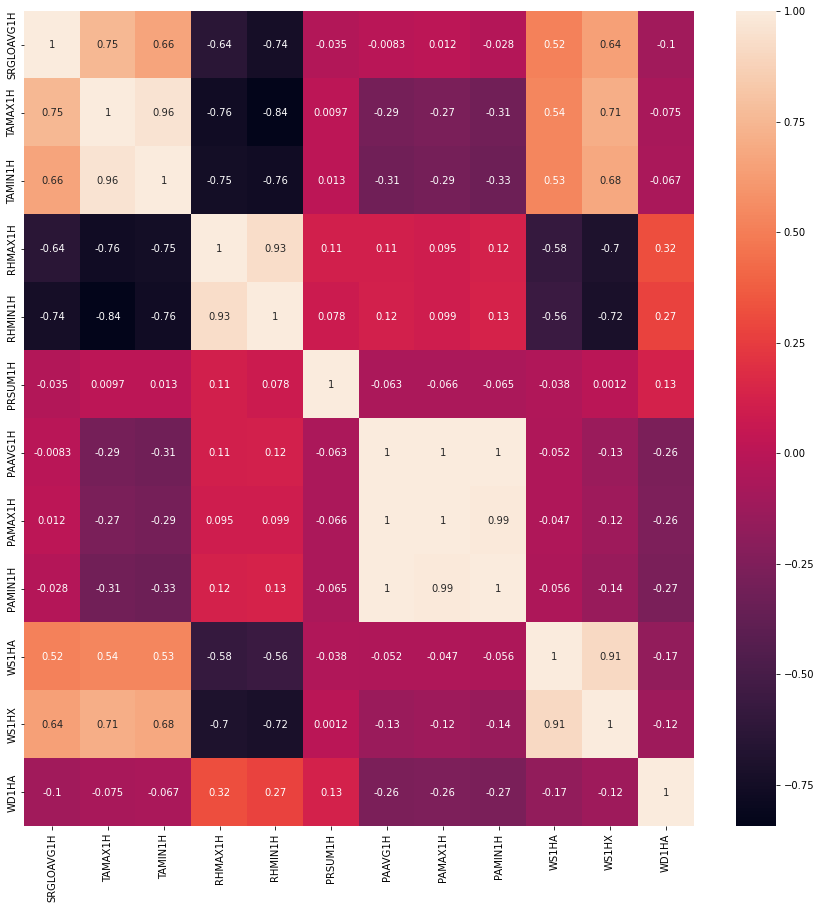

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True)

In [ ]:
corr_values = corr_matrix.unstack()

In [ ]:
corr_values['SRGLOAVG1H'].sort_values(ascending=False)

SRGLOAVG1H    1.000000
TAMAX1H       0.751529
TAMIN1H       0.663405
WS1HX         0.644763
WS1HA         0.517205
PAMAX1H       0.011502
PAAVG1H      -0.008305
PAMIN1H      -0.028357
PRSUM1H      -0.034822
WD1HA        -0.102986
RHMAX1H      -0.640184
RHMIN1H      -0.737505
dtype: float64

In [20]:
df_viento = df2015['WS1HA']

Correlación viento - radiación solar Quito

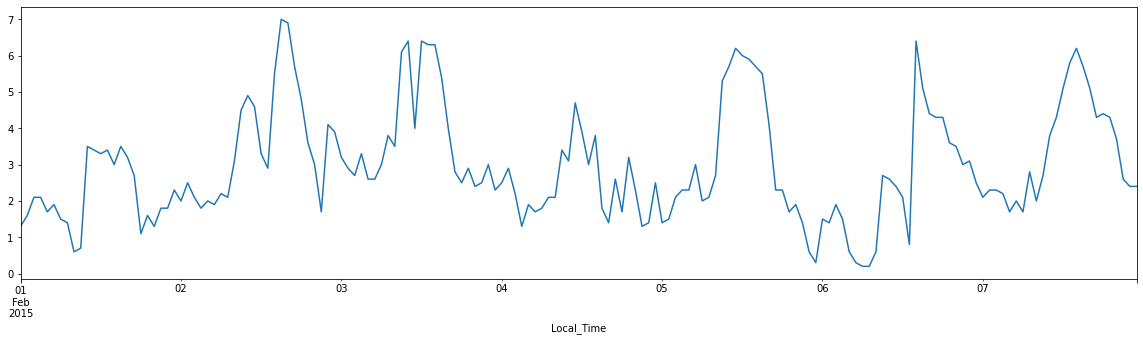

In [22]:
df_viento['2015-02-01':'2015-02-07'].plot(figsize = (20,5))

Las variables con mayor correlación son:
* Temperatura máxima y mínima (positiva)
* Humedad relativa máxima y mínima (negativa)
* Velocidad del viento promedio y máxima (positiva)

In [ ]:
corr_values['TAMAX1H']

SRGLOAVG1H    0.751529
TAMAX1H       1.000000
TAMIN1H       0.960596
RHMAX1H      -0.761022
RHMIN1H      -0.844383
PRSUM1H       0.009717
PAAVG1H      -0.289704
PAMAX1H      -0.270793
PAMIN1H      -0.308152
WS1HA         0.536360
WS1HX         0.705499
WD1HA        -0.075234
dtype: float64

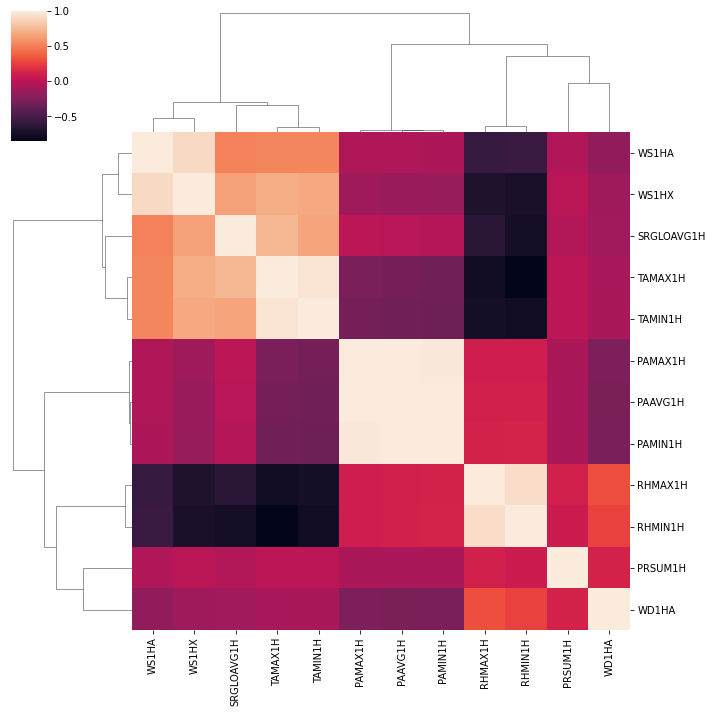

In [ ]:
sns.clustermap(corr_matrix)

In [10]:
dfDatos  = pd.read_excel('/content/drive/MyDrive/DatosInvestigacion/pv wind.xlsx')

In [23]:
dfDatos.shape

(22031, 2)

In [12]:
values = dfDatos.corr()

In [15]:
values

,821.9,0.0
821.9,1.000000,0.125846
0.0,0.125846,1.000000
